In [1]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob
import os

path = '/content/drive/MyDrive/senior_thesis/llm_bar/final_outputs'

dfs = {}
for filename in os.listdir(path):
  if filename.endswith('.csv'):
    file_path = os.path.join(path, filename)

    df = pd.read_csv(file_path)
    print(df)
    filename = filename[:-4]
    # df['id'] = df['id'].astype(int)
    df['correct'] = df['correct'].astype(str).str.strip()
    df['correct'] = df['correct'].str.replace('True', '1')
    df['correct'] = df['correct'].str.replace('False', '0')
    df['correct'] = df['correct'].astype(int)
    dfs[filename] = df.copy()

    id                                              input  \
0    0  Summarize the following content.\n\nMy girlfri...   
1    1  Complete a brief story given the following fir...   
2    2  How many integers are in the solution of the i...   
3    3  Why does eating something crunchy sound so lou...   
4    4  Summarize the following content.\n\nMy bf only...   
..  ..                                                ...   
95  95  What is the best way to defeat a demon? I beli...   
96  96  Complete the following sentence: "Yesterday it...   
97  97  Find the nearest restaurant from a given addre...   
98  98                        How can I identify Panther?   
99  99  Rewrite the given sentence to make it more exp...   

                                             output_1  \
0   My girlfriend's visa to stay in the UK expires...   
1   He learned his weather report. He prepared for...   
2   The inequality |x + 5| < 10 means that the abs...   
3   The sound is transmitted through th

In [4]:
dfs.keys()

dict_keys(['phi-4-mini-it', 'qwen-2.5-0.5b-it', 'qwen-2.5-1.5b-it', 'qwen-2.5-3b-it', 'qwen-2.5-7b-it-1m', 'qwen-2.5-7b-it', 'flan-t5-large', 'llama-3-8b-it', 'flan-t5-base', 'llama-3.2-3b-it', 'mistral-7b-it-v0.1', 'gemma-2-2b-it', 'flan-t5-small', 'gemma-1.1-2b-it', 'llama-3.2-1b-it', 'mistral-nemo-it-2407', 'mistral-7b-it-v0.3', 'olmo-7b-it', 'mistral-8b-it-2410', 'olmoe-1b-7b-0924-it', 'phi-3-medium-4k-it', 'phi-3.5-mini-it', 'phi-3-mini-4k-it', 'flan-t5-xl'])

In [5]:
dfs['phi-3-mini-4k-it']

,id,input,output_1,output_2,correct
0,0,Summarize the following content.\n\nMy girlfri...,My girlfriend's visa to stay in the UK expires...,My girlfriend is Malaysian and has been studyi...,1
1,1,Complete a brief story given the following fir...,He learned his weather report. He prepared for...,He would always mistreat it every day. He eats...,1
2,2,How many integers are in the solution of the i...,The inequality |x + 5| < 10 means that the abs...,The list of integers that satisfy the inequali...,1
3,3,Why does eating something crunchy sound so lou...,The sound is transmitted through the vibration...,The noise that crunchy foods make when we eat ...,0
4,4,Summarize the following content.\n\nMy bf only...,Boyfriend only likes to talk through text. He ...,My boyfriend only likes to text me for shallow...,1
...,...,...,...,...,...
93,95,Give me an example of a situation involving th...,"For example, a total order of tasks can be est...",A priority queue can be used in a taxi dispatc...,0
94,96,Analyze this article for tone:\n\nThe Seattle ...,"The tone of this article is positive, emphasiz...","The tone of the article is mostly positive, wi...",0
95,97,What is the best way to defeat a demon? I beli...,The best way to defeat a demon is to use the p...,The best way to defeat depression can vary dep...,1
96,98,"Complete the following sentence: ""Yesterday it...","Yesterday it was raining, so I put on my jacke...","Yesterday it was raining, so I put on my rainc...",0


In [6]:
ground_truth = pd.read_csv('/content/drive/MyDrive/senior_thesis/llm_bar/llmbar_ground_truth.csv')
ground_truth.head()

,id,input,output_1,output_2,label
0,0,Summarize the following content.\n\nMy girlfri...,My girlfriend's visa to stay in the UK expires...,My girlfriend is Malaysian and has been studyi...,1
1,1,Complete a brief story given the following fir...,He learned his weather report. He prepared for...,He would always mistreat it every day. He eats...,1
2,2,How many integers are in the solution of the i...,The inequality |x + 5| < 10 means that the abs...,The list of integers that satisfy the inequali...,1
3,3,Why does eating something crunchy sound so lou...,The sound is transmitted through the vibration...,The noise that crunchy foods make when we eat ...,1
4,4,Summarize the following content.\n\nMy bf only...,Boyfriend only likes to talk through text. He ...,My boyfriend only likes to text me for shallow...,2


In [7]:
result = ground_truth.copy()

for i, df in dfs.items():
    df['id'] = df['id'].astype(int)

    df_renamed = df.rename(columns={'correct': f'{i}'})

    df_renamed = df_renamed[['id', f'{i}']]

    result = result.merge(df_renamed, on='id', how='inner')


In [8]:
result

,id,input,output_1,output_2,label,phi-4-mini-it,qwen-2.5-0.5b-it,qwen-2.5-1.5b-it,qwen-2.5-3b-it,qwen-2.5-7b-it-1m,...,llama-3.2-1b-it,mistral-nemo-it-2407,mistral-7b-it-v0.3,olmo-7b-it,mistral-8b-it-2410,olmoe-1b-7b-0924-it,phi-3-medium-4k-it,phi-3.5-mini-it,phi-3-mini-4k-it,flan-t5-xl
0,0,Summarize the following content.\n\nMy girlfri...,My girlfriend's visa to stay in the UK expires...,My girlfriend is Malaysian and has been studyi...,1,1,1,0,0,1,...,1,1,1,0,1,1,1,1,1,1
1,1,Complete a brief story given the following fir...,He learned his weather report. He prepared for...,He would always mistreat it every day. He eats...,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2,How many integers are in the solution of the i...,The inequality |x + 5| < 10 means that the abs...,The list of integers that satisfy the inequali...,1,1,1,1,1,1,...,0,1,1,0,1,1,1,1,1,1
3,3,Why does eating something crunchy sound so lou...,The sound is transmitted through the vibration...,The noise that crunchy foods make when we eat ...,1,1,1,0,0,1,...,1,0,1,1,0,1,1,0,0,1
4,5,Complete a brief story given the following fir...,My wife felt very down so I started to play a ...,"We were expecting a refund. the next week, the...",1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,95,What is the best way to defeat a demon? I beli...,The best way to defeat a demon is to use the p...,The best way to defeat depression can vary dep...,1,1,1,0,1,1,...,1,1,1,0,1,1,0,1,0,1
62,96,"Complete the following sentence: ""Yesterday it...","Yesterday it was raining, so I put on my jacke...","Yesterday it was raining, so I put on my rainc...",2,0,0,1,1,1,...,0,1,1,0,0,1,0,0,0,1
63,97,Find the nearest restaurant from a given addre...,"The nearest restaurant to 715 Church St, Evans...","The nearest restaurant is ""elephant + vine"", l...",2,1,0,1,1,1,...,0,1,0,0,1,0,1,1,1,0
64,98,How can I identify Panther?,"The Panther is a large, dangerous mammal, typi...",The Panther is a mostly solitary species of ma...,2,0,0,1,1,0,...,0,0,1,1,1,1,1,0,0,1


In [9]:
getting_accuracy = result.drop(columns=['id','input', 'output_1', 'output_2', 'label'])

getting_accuracy

,phi-4-mini-it,qwen-2.5-0.5b-it,qwen-2.5-1.5b-it,qwen-2.5-3b-it,qwen-2.5-7b-it-1m,qwen-2.5-7b-it,flan-t5-large,llama-3-8b-it,flan-t5-base,llama-3.2-3b-it,...,llama-3.2-1b-it,mistral-nemo-it-2407,mistral-7b-it-v0.3,olmo-7b-it,mistral-8b-it-2410,olmoe-1b-7b-0924-it,phi-3-medium-4k-it,phi-3.5-mini-it,phi-3-mini-4k-it,flan-t5-xl
0,1,1,0,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
1,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
3,1,1,0,0,1,1,0,0,1,1,...,1,0,1,1,0,1,1,0,0,1
4,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1,1,0,1,1,1,1,0,1,0,...,1,1,1,0,1,1,0,1,0,1
62,0,0,1,1,1,1,1,0,0,1,...,0,1,1,0,0,1,0,0,0,1
63,1,0,1,1,1,1,1,0,0,1,...,0,1,0,0,1,0,1,1,1,0
64,0,0,1,1,0,1,1,0,0,0,...,0,0,1,1,1,1,1,0,0,1


In [10]:
result.to_csv('llmbar_results.csv')

Model Accuracies (%):
                   Model   Accuracy
0         qwen-2.5-7b-it  84.848485
1      qwen-2.5-7b-it-1m  83.333333
2         qwen-2.5-3b-it  81.818182
3     mistral-8b-it-2410  78.787879
4   mistral-nemo-it-2407  75.757576
5          phi-4-mini-it  71.212121
6    olmoe-1b-7b-0924-it  68.181818
7     mistral-7b-it-v0.3  68.181818
8        phi-3.5-mini-it  66.666667
9             flan-t5-xl  66.666667
10       llama-3.2-3b-it  63.636364
11         flan-t5-large  60.606061
12      phi-3-mini-4k-it  60.606061
13            olmo-7b-it  60.606061
14         gemma-2-2b-it  60.606061
15    phi-3-medium-4k-it  59.090909
16      qwen-2.5-1.5b-it  57.575758
17       gemma-1.1-2b-it  57.575758
18      qwen-2.5-0.5b-it  53.030303
19       llama-3.2-1b-it  48.484848
20          flan-t5-base  46.969697
21         flan-t5-small  46.969697
22    mistral-7b-it-v0.1  46.969697
23         llama-3-8b-it  45.454545


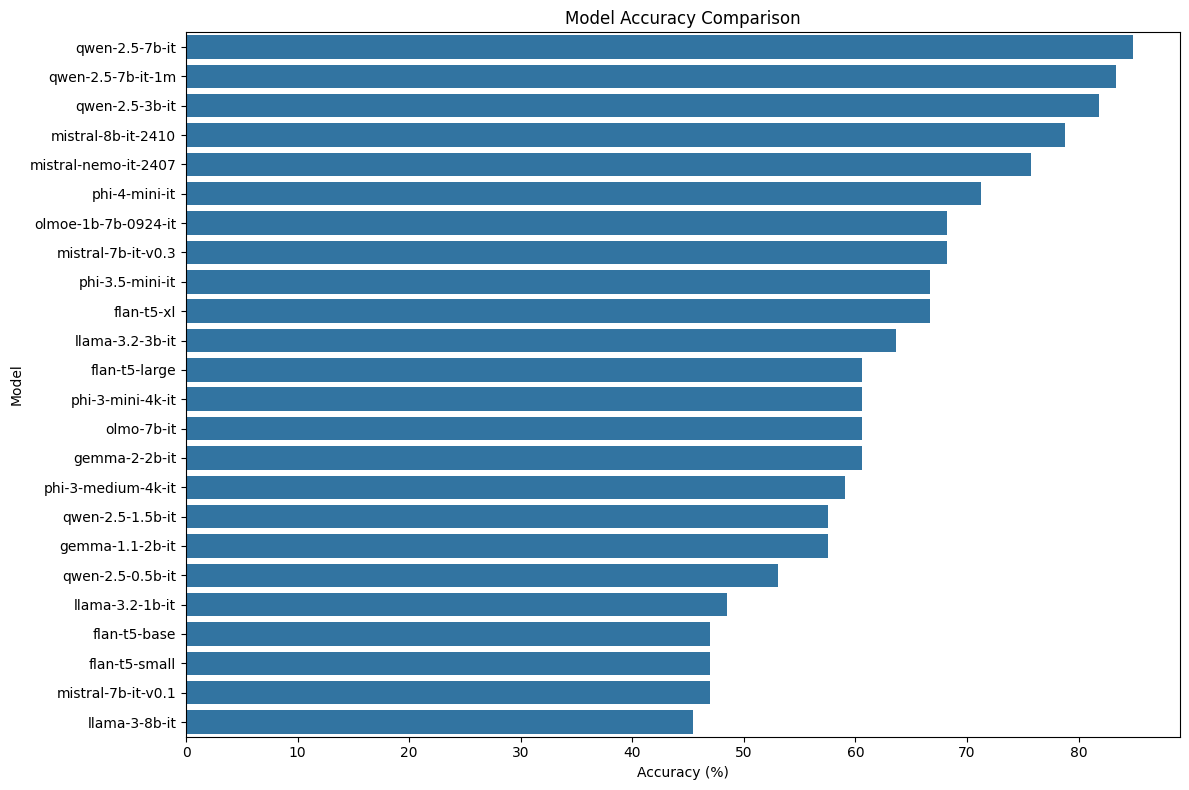


Total number of examples: 66

Best performing model: qwen-2.5-7b-it with accuracy 84.85%
Worst performing model: llama-3-8b-it with accuracy 45.45%


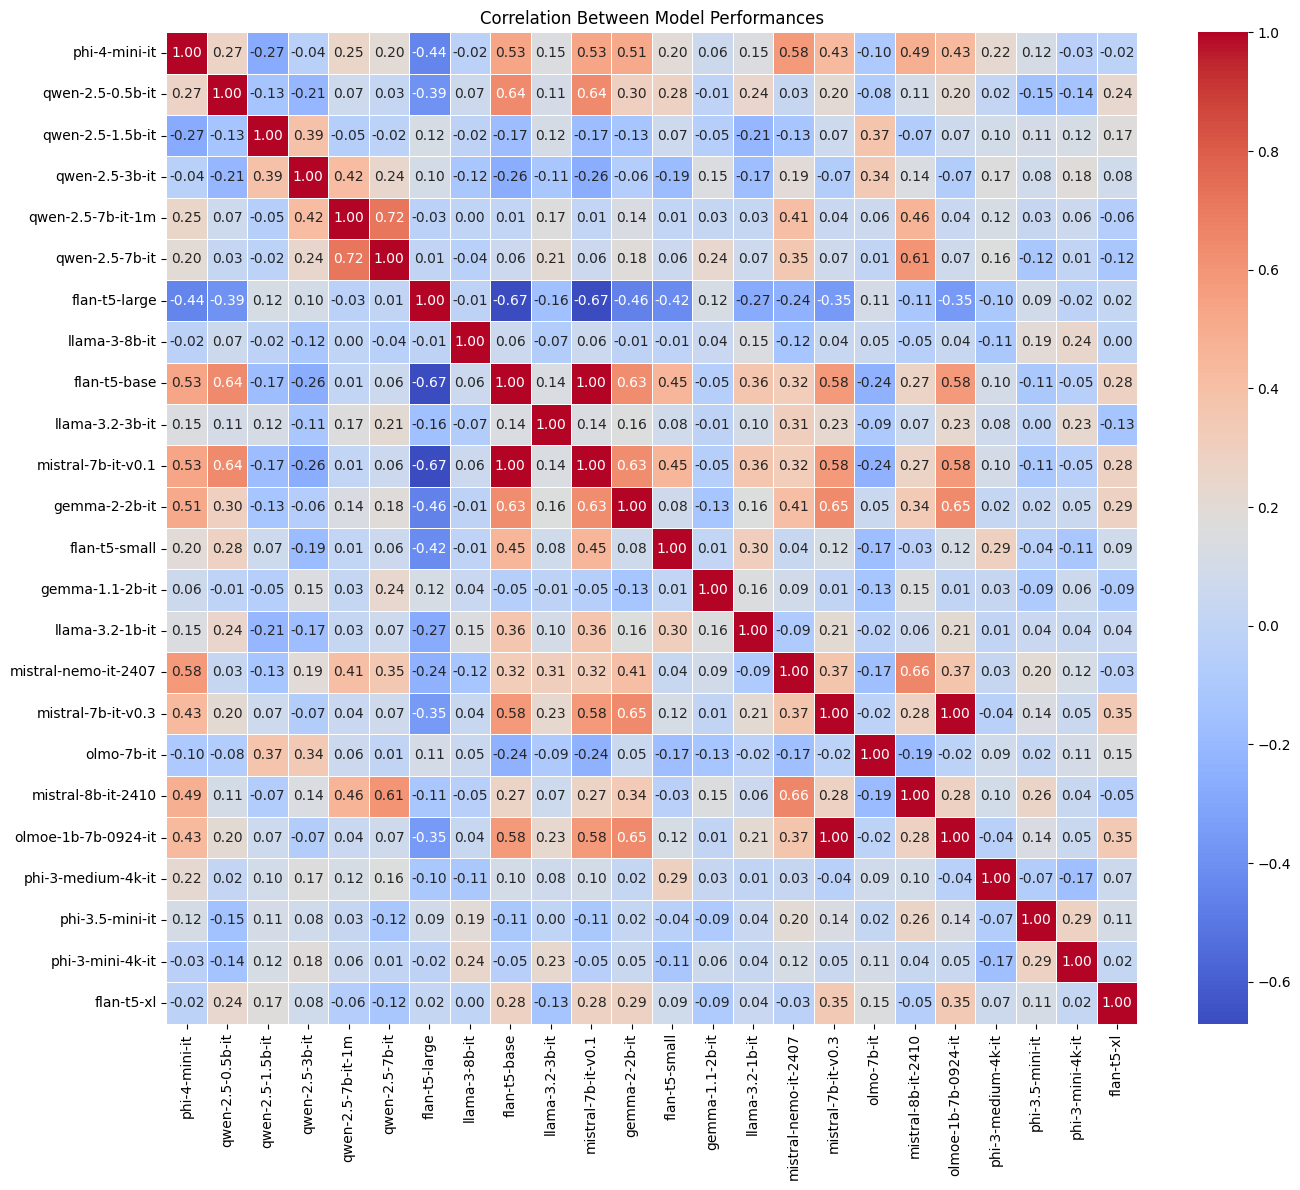

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('llmbar_results.csv')

# List of model columns (excluding non-model columns)
model_columns = [col for col in df.columns if col not in ['Unnamed: 0', 'id', 'input', 'output_1', 'output_2', 'label']]

# Calculate accuracy for each model
accuracies = {}
for model in model_columns:
    # Calculate accuracy (assuming 1 is correct and 0 is incorrect)
    accuracy = df[model].mean() * 100  # Convert to percentage
    accuracies[model] = accuracy

# Create a dataframe with the accuracies
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

# Display the accuracies
print("Model Accuracies (%):")
print(accuracy_df)
accuracy_df.to_csv('llm_bar_model_accuracies.csv')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df)
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.tight_layout()
plt.savefig('model_accuracies.png')
plt.show()

# Calculate additional statistics
total_examples = len(df)
print(f"\nTotal number of examples: {total_examples}")

# Get the best and worst performing models
best_model = accuracy_df.iloc[0]
worst_model = accuracy_df.iloc[-1]

print(f"\nBest performing model: {best_model['Model']} with accuracy {best_model['Accuracy']:.2f}%")
print(f"Worst performing model: {worst_model['Model']} with accuracy {worst_model['Accuracy']:.2f}%")

# Calculate correlation between model performances
correlation_matrix = df[model_columns].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Between Model Performances')
plt.tight_layout()
plt.savefig('model_correlations.png')
plt.show()

In [12]:
formatted_data = result.copy()
formatted_data = formatted_data.drop(columns=['id', 'input', 'output_1','output_2', 'label'])
formatted_data

,phi-4-mini-it,qwen-2.5-0.5b-it,qwen-2.5-1.5b-it,qwen-2.5-3b-it,qwen-2.5-7b-it-1m,qwen-2.5-7b-it,flan-t5-large,llama-3-8b-it,flan-t5-base,llama-3.2-3b-it,...,llama-3.2-1b-it,mistral-nemo-it-2407,mistral-7b-it-v0.3,olmo-7b-it,mistral-8b-it-2410,olmoe-1b-7b-0924-it,phi-3-medium-4k-it,phi-3.5-mini-it,phi-3-mini-4k-it,flan-t5-xl
0,1,1,0,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
1,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
3,1,1,0,0,1,1,0,0,1,1,...,1,0,1,1,0,1,1,0,0,1
4,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1,1,0,1,1,1,1,0,1,0,...,1,1,1,0,1,1,0,1,0,1
62,0,0,1,1,1,1,1,0,0,1,...,0,1,1,0,0,1,0,0,0,1
63,1,0,1,1,1,1,1,0,0,1,...,0,1,0,0,1,0,1,1,1,0
64,0,0,1,1,0,1,1,0,0,0,...,0,0,1,1,1,1,1,0,0,1


In [13]:
model_names = formatted_data.columns.tolist()
formatted_data = formatted_data.to_numpy()

results = {}
for model_name in model_names:
    results[model_name] = {"subject_id": model_name, "responses": {}}

for i in range(formatted_data.shape[0]):
    question_id = f"q{i+1}"

    for j, model_name in enumerate(model_names):
        results[model_name]["responses"][question_id] = int(formatted_data[i, j])

jsonl_output = "\n".join([json.dumps(results[model]) for model in model_names])

with open("formatted_data.jsonl", "w") as f:
    f.write(jsonl_output)

## final try of irt

In [14]:
!pip install pandas pyro-ppl py-irt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [15]:
!py-irt train 1pl formatted_data.jsonl output/output_1pl --lr 0.03 --epochs 1500 --priors vague

[01:25:15] config: model_type='1pl' epochs=1500 priors='vague' initializers=[] dims=None  ]8;id=961275;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=908332;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#109\109]8;;\
           lr=0.03 lr_decay=0.9999 dropout=0.5 hidden=100 vocab_size=None log_every=100             
           seed=None deterministic=False                                                            
           data_path: formatted_data.jsonl                                                ]8;id=325355;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=295980;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#111\111]8;;\
           output directory: output/output_1pl                                            ]8;id=545692;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=133442;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#1

In [16]:
with open ("output/output_1pl/best_parameters.json","r") as file:
    results = json.load(file)
results.keys()

dict_keys(['ability', 'diff', 'irt_model', 'item_ids', 'subject_ids'])

In [17]:
len(results["diff"])

66

In [18]:
results['subject_ids']

{'0': 'phi-4-mini-it',
 '1': 'qwen-2.5-0.5b-it',
 '2': 'qwen-2.5-1.5b-it',
 '3': 'qwen-2.5-3b-it',
 '4': 'qwen-2.5-7b-it-1m',
 '5': 'qwen-2.5-7b-it',
 '6': 'flan-t5-large',
 '7': 'llama-3-8b-it',
 '8': 'flan-t5-base',
 '9': 'llama-3.2-3b-it',
 '10': 'mistral-7b-it-v0.1',
 '11': 'gemma-2-2b-it',
 '12': 'flan-t5-small',
 '13': 'gemma-1.1-2b-it',
 '14': 'llama-3.2-1b-it',
 '15': 'mistral-nemo-it-2407',
 '16': 'mistral-7b-it-v0.3',
 '17': 'olmo-7b-it',
 '18': 'mistral-8b-it-2410',
 '19': 'olmoe-1b-7b-0924-it',
 '20': 'phi-3-medium-4k-it',
 '21': 'phi-3.5-mini-it',
 '22': 'phi-3-mini-4k-it',
 '23': 'flan-t5-xl'}

In [19]:
items = pd.DataFrame(
    index=results["item_ids"],
    data= results["diff"],
    columns=["diff"]
)
items.head()

,diff
0,-12.898433
1,-14.249836
2,-12.273630
3,-1.517585
4,-16.060493


In [20]:

df = pd.DataFrame.from_dict(results['subject_ids'], orient="index", columns=["models"])
df.index = df.index.astype(int)

df.head()

,models
0,phi-4-mini-it
1,qwen-2.5-0.5b-it
2,qwen-2.5-1.5b-it
3,qwen-2.5-3b-it
4,qwen-2.5-7b-it-1m


In [21]:
subjects = pd.DataFrame(
    index=results["subject_ids"],
    data= results["ability"],
    columns=["ability_1pl"]
)
subjects.set_index(df.index, inplace=True)
subjects = pd.merge(subjects, df, left_index = True, right_index = True)
subjects.head()

,ability_1pl,models
0,1.580739,phi-4-mini-it
1,-1.329679,qwen-2.5-0.5b-it
2,-0.595682,qwen-2.5-1.5b-it
3,3.471623,qwen-2.5-3b-it
4,3.826300,qwen-2.5-7b-it-1m


## Comparing to benchmarks?

In [22]:
#df for abilities from output
thetas = pd.DataFrame({"Model": subjects['models'], "Theta": subjects['ability_1pl']})
thetas



,Model,Theta
0,phi-4-mini-it,1.580739
1,qwen-2.5-0.5b-it,-1.329679
2,qwen-2.5-1.5b-it,-0.595682
3,qwen-2.5-3b-it,3.471623
4,qwen-2.5-7b-it-1m,3.826300
5,qwen-2.5-7b-it,4.066705
6,flan-t5-large,-0.140669
7,llama-3-8b-it,-2.514460
8,flan-t5-base,-2.339405
9,llama-3.2-3b-it,0.363503


In [23]:
benchmarks = pd.read_csv("https://docs.google.com/spreadsheets/d/1WFo0Jxw9Iy2gCEhPUSaMQ5P_8CZkhUA6mP2pjcLI2os/export?format=csv")
benchmarks.head()



,Model,IFEval,Big_Bench_Hard,MuSR
0,flan-t5-large,22.01,17.51,9.01
1,flan-t5-xl,22.37,22.70,11.33
2,flan-t5-base,18.91,11.34,3.22
3,flan-t5-small,15.24,6.36,10.37
4,gemma-1.1-2b-it,30.67,5.86,2.02


In [24]:
stats = pd.merge(benchmarks, thetas, on='Model')
stats

,Model,IFEval,Big_Bench_Hard,MuSR,Theta
0,flan-t5-large,22.01,17.51,9.01,-0.140669
1,flan-t5-xl,22.37,22.70,11.33,0.757645
2,flan-t5-base,18.91,11.34,3.22,-2.339405
3,flan-t5-small,15.24,6.36,10.37,-2.320214
4,gemma-1.1-2b-it,30.67,5.86,2.02,-0.503488
5,gemma-2-2b-it,56.68,17.98,7.08,-0.120376
6,llama-3-8b-it,74.08,28.24,1.60,-2.514460
7,llama-3.2-1b-it,56.98,8.74,2.97,-2.099601
8,llama-3.2-3b-it,73.93,24.06,1.37,0.363503
9,mistral-7b-it-v0.1,44.87,7.65,6.13,-2.179734


In [25]:
stats.to_csv('thetas_llmbar.csv')

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
stats_minmax = stats.copy()
stats_minmax[["IFEval", "Big_Bench_Hard", "MuSR", "Theta"]] = scaler_minmax.fit_transform(stats[["IFEval", "Big_Bench_Hard", "MuSR", "Theta"]])

# # should z score instead maybe??? Idk girl
# scaler_std = StandardScaler()
# stats_std = stats.copy()
# stats_std[["IFEval", "Big Bench Hard", "MuSR", "Theta"]] = scaler_std.fit_transform(stats[["IFEval", "Big Bench Hard", "MuSR", "Theta"]])

print(stats_minmax.head())
# print(stats_std.head())


             Model    IFEval  Big_Bench_Hard      MuSR     Theta
0    flan-t5-large  0.114281        0.267693  0.662562  0.374370
1       flan-t5-xl  0.120358        0.386949  0.853038  0.516043
2     flan-t5-base  0.061951        0.125919  0.187192  0.027608
3    flan-t5-small  0.000000        0.011489  0.774220  0.030634
4  gemma-1.1-2b-it  0.260466        0.000000  0.088670  0.317150


In [27]:
def get_theta_info(stats):

  from scipy.stats import spearmanr

  correlations = {col: spearmanr(stats["Theta"], stats[col])[0] for col in ["IFEval", "Big_Bench_Hard", "MuSR"]}
  print("Spearman Correlations with Theta:", correlations)

    #explained variance
  from sklearn.linear_model import LinearRegression
  X = stats[["IFEval", "Big_Bench_Hard", "MuSR"]]
  y = stats["Theta"]
  reg = LinearRegression().fit(X, y)
  r_squared = reg.score(X, y)
  print("R² of Theta predicting benchmarks:", r_squared)

In [28]:
get_theta_info(stats_minmax)

Spearman Correlations with Theta: {'IFEval': np.float64(0.48320158102766797), 'Big_Bench_Hard': np.float64(0.5642292490118578), 'MuSR': np.float64(0.40019762845849804)}
R² of Theta predicting benchmarks: 0.3634295561398727


In [29]:
get_theta_info(stats)

Spearman Correlations with Theta: {'IFEval': np.float64(0.48320158102766797), 'Big_Bench_Hard': np.float64(0.5642292490118578), 'MuSR': np.float64(0.40019762845849804)}
R² of Theta predicting benchmarks: 0.3634295561398726


In [30]:
!py-irt train 2pl formatted_data.jsonl output/output_2pl --lr 0.03 --epochs 150 --priors vague

[01:25:51] config: model_type='2pl' epochs=150 priors='vague' initializers=[] dims=None   ]8;id=420629;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=663566;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#109\109]8;;\
           lr=0.03 lr_decay=0.9999 dropout=0.5 hidden=100 vocab_size=None log_every=100             
           seed=None deterministic=False                                                            
           data_path: formatted_data.jsonl                                                ]8;id=631484;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=109922;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#111\111]8;;\
           output directory: output/output_2pl                                            ]8;id=804881;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=855907;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#1

In [31]:
with open ("output/output_2pl/best_parameters.json","r") as file:
    results_2 = json.load(file)
results_2.keys()

dict_keys(['ability', 'diff', 'disc', 'irt_model', 'item_ids', 'subject_ids'])

In [32]:
items_2 = pd.DataFrame(
    index=results["item_ids"],
    data= results["diff"],
    columns=["diff"]
)

items_2['disc'] = results_2['disc']
items_2

,diff,disc
0,-12.898433,0.226921
1,-14.249836,0.234675
2,-12.273630,0.213677
3,-1.517585,0.191337
4,-16.060493,0.228382
...,...,...
61,-3.020855,0.212012
62,1.067745,0.209076
63,-0.465341,0.216542
64,0.863472,0.205354


In [33]:
result

,id,input,output_1,output_2,label,phi-4-mini-it,qwen-2.5-0.5b-it,qwen-2.5-1.5b-it,qwen-2.5-3b-it,qwen-2.5-7b-it-1m,...,llama-3.2-1b-it,mistral-nemo-it-2407,mistral-7b-it-v0.3,olmo-7b-it,mistral-8b-it-2410,olmoe-1b-7b-0924-it,phi-3-medium-4k-it,phi-3.5-mini-it,phi-3-mini-4k-it,flan-t5-xl
0,0,Summarize the following content.\n\nMy girlfri...,My girlfriend's visa to stay in the UK expires...,My girlfriend is Malaysian and has been studyi...,1,1,1,0,0,1,...,1,1,1,0,1,1,1,1,1,1
1,1,Complete a brief story given the following fir...,He learned his weather report. He prepared for...,He would always mistreat it every day. He eats...,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2,How many integers are in the solution of the i...,The inequality |x + 5| < 10 means that the abs...,The list of integers that satisfy the inequali...,1,1,1,1,1,1,...,0,1,1,0,1,1,1,1,1,1
3,3,Why does eating something crunchy sound so lou...,The sound is transmitted through the vibration...,The noise that crunchy foods make when we eat ...,1,1,1,0,0,1,...,1,0,1,1,0,1,1,0,0,1
4,5,Complete a brief story given the following fir...,My wife felt very down so I started to play a ...,"We were expecting a refund. the next week, the...",1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,95,What is the best way to defeat a demon? I beli...,The best way to defeat a demon is to use the p...,The best way to defeat depression can vary dep...,1,1,1,0,1,1,...,1,1,1,0,1,1,0,1,0,1
62,96,"Complete the following sentence: ""Yesterday it...","Yesterday it was raining, so I put on my jacke...","Yesterday it was raining, so I put on my rainc...",2,0,0,1,1,1,...,0,1,1,0,0,1,0,0,0,1
63,97,Find the nearest restaurant from a given addre...,"The nearest restaurant to 715 Church St, Evans...","The nearest restaurant is ""elephant + vine"", l...",2,1,0,1,1,1,...,0,1,0,0,1,0,1,1,1,0
64,98,How can I identify Panther?,"The Panther is a large, dangerous mammal, typi...",The Panther is a mostly solitary species of ma...,2,0,0,1,1,0,...,0,0,1,1,1,1,1,0,0,1


In [34]:
result = result.reset_index(drop=True)
items_2 = items_2.reset_index(drop=True)

if len(result) == len(items_2):
    items_2['id'] = result['id'].values
items_2

,diff,disc,id
0,-12.898433,0.226921,0
1,-14.249836,0.234675,1
2,-12.273630,0.213677,2
3,-1.517585,0.191337,3
4,-16.060493,0.228382,5
...,...,...,...
61,-3.020855,0.212012,95
62,1.067745,0.209076,96
63,-0.465341,0.216542,97
64,0.863472,0.205354,98


In [35]:
items_2.to_csv('llmbar_items_2pl.csv')

In [36]:

df_2 = pd.DataFrame.from_dict(results_2['item_ids'], orient="index", columns=["items"])
df_2.index = df_2.index.astype(int)

df_2

,items
0,q1
1,q2
2,q3
3,q4
4,q5
...,...
61,q62
62,q63
63,q64
64,q65


In [37]:
items_df_2 = pd.merge(items_2, df_2, left_index = True, right_index = True)
items_df_2.head()

,diff,disc,id,items
0,-12.898433,0.226921,0,q1
1,-14.249836,0.234675,1,q2
2,-12.273630,0.213677,2,q3
3,-1.517585,0.191337,3,q4
4,-16.060493,0.228382,5,q5


In [38]:

df_2 = pd.DataFrame.from_dict(results_2['subject_ids'], orient="index", columns=["models"])
df_2.index = df_2.index.astype(int)

df_2

subjects_2 = pd.DataFrame(
    index=results_2["subject_ids"],
    data= results_2["ability"],
    columns=["ability_2pl"]
)
subjects_2.set_index(df_2.index, inplace=True)
subjects_2 = pd.merge(subjects_2, df_2, left_index = True, right_index = True)
subjects_2.head()



,ability_2pl,models
0,1.698417,phi-4-mini-it
1,0.199672,qwen-2.5-0.5b-it
2,0.649827,qwen-2.5-1.5b-it
3,2.057143,qwen-2.5-3b-it
4,2.069069,qwen-2.5-7b-it-1m


In [39]:
#df for abilities from output
thetas_2 = pd.DataFrame({"Model": subjects_2['models'], "Theta_2pl": subjects_2['ability_2pl']})
thetas_2


,Model,Theta_2pl
0,phi-4-mini-it,1.698417
1,qwen-2.5-0.5b-it,0.199672
2,qwen-2.5-1.5b-it,0.649827
3,qwen-2.5-3b-it,2.057143
4,qwen-2.5-7b-it-1m,2.069069
5,qwen-2.5-7b-it,2.220043
6,flan-t5-large,0.977395
7,llama-3-8b-it,-0.342583
8,flan-t5-base,-0.194141
9,llama-3.2-3b-it,1.228031


In [40]:
stats_2 = pd.merge(benchmarks, thetas_2, on='Model')
stats_2

,Model,IFEval,Big_Bench_Hard,MuSR,Theta_2pl
0,flan-t5-large,22.01,17.51,9.01,0.977395
1,flan-t5-xl,22.37,22.70,11.33,1.450231
2,flan-t5-base,18.91,11.34,3.22,-0.194141
3,flan-t5-small,15.24,6.36,10.37,-0.269086
4,gemma-1.1-2b-it,30.67,5.86,2.02,0.658541
5,gemma-2-2b-it,56.68,17.98,7.08,1.015456
6,llama-3-8b-it,74.08,28.24,1.60,-0.342583
7,llama-3.2-1b-it,56.98,8.74,2.97,-0.055270
8,llama-3.2-3b-it,73.93,24.06,1.37,1.228031
9,mistral-7b-it-v0.1,44.87,7.65,6.13,-0.299350


In [41]:
get_theta_info(stats_2)

KeyError: 'Theta'

In [ ]:
final_stats = pd.merge(stats_2, thetas, on='Model')
final_stats

In [ ]:
final_stats.to_csv('thetas_llmbar.csv')